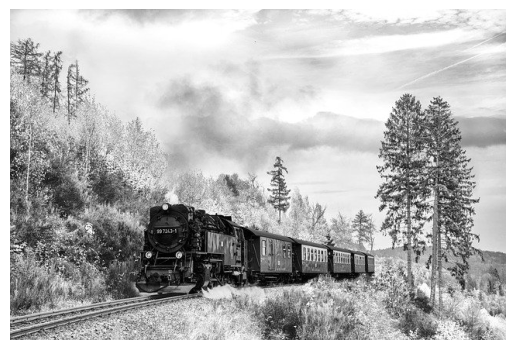

In [1]:
# Histogram equalization, 히스토그램 평탄화
# 히스토그램이 특정 영역에 집중되어 있는 부분을 평탄하게 만들어주는 작업
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("d:/data/images/winter.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
plt.axis("off")
plt.show()

In [2]:
import numpy as np
histogram, bin = np.histogram(img.ravel(), 256, [0, 256])
cumsum = histogram.cumsum()
#LUT(Look Up Table, 룩업 테이블)
# A = B의 집합, A를 입력하면 B가 리턴됨, 반복문을 돌리는 것보다 빠른 연산 속도
LUT = np.uint8((cumsum - cumsum.min()) * 255 / (cumsum.max() - cumsum.min()))
equ = LUT[gray]
hist = cv2.equalizeHist(gray) #gray 이미지에만 적용 가능

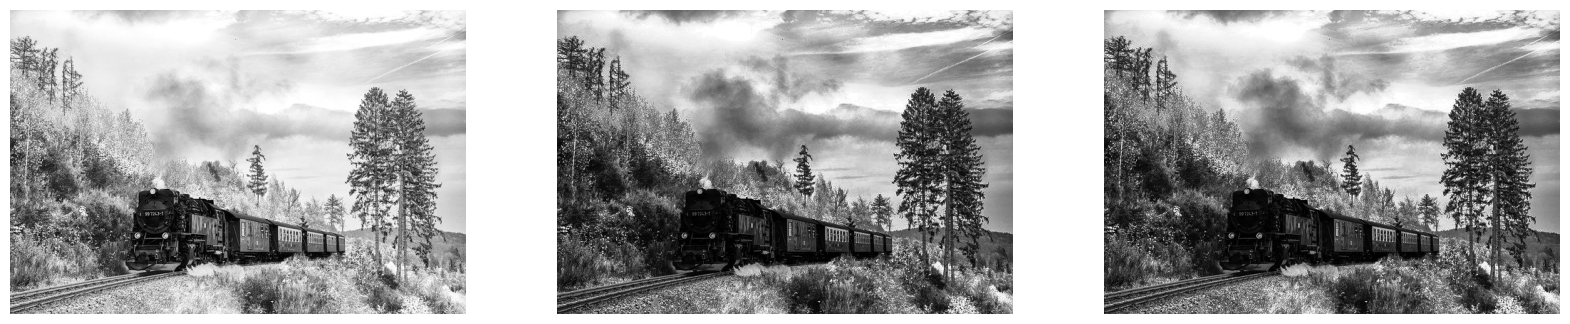

In [3]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.imshow(gray,cmap='gray')
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(equ,cmap='gray')
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(hist,cmap='gray')
plt.axis("off")
plt.show()

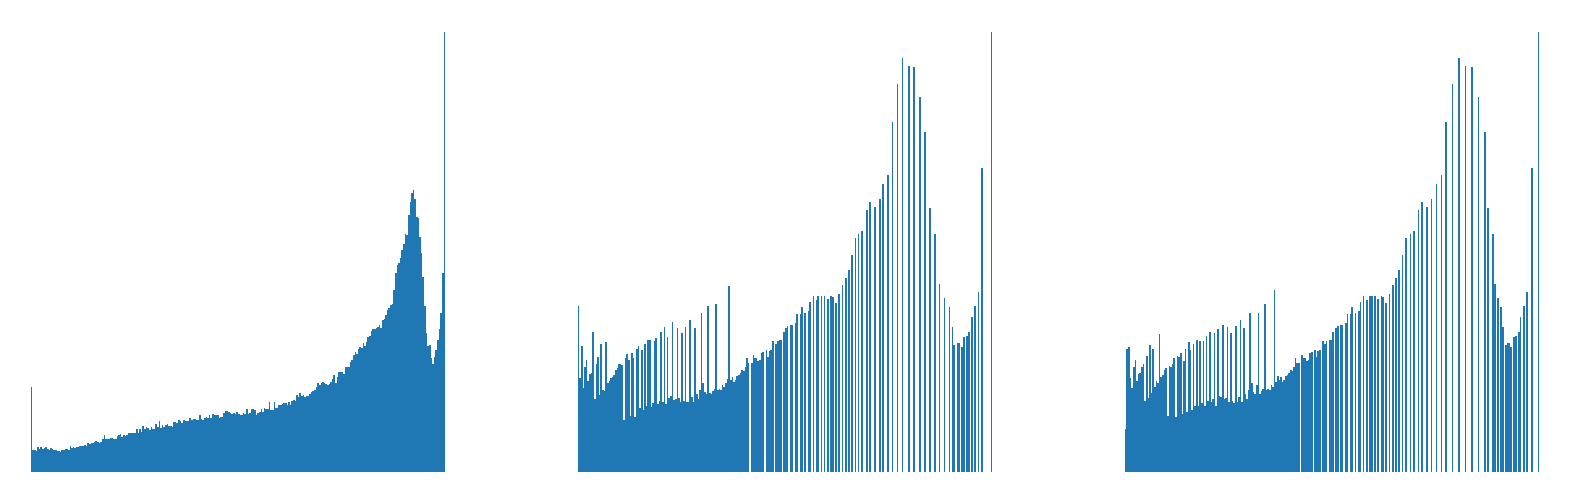

In [4]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.hist(img.ravel(), 256, [0, 256])
plt.axis("off")
plt.subplot(1, 3, 2)
plt.hist(equ.ravel(), 256, [0, 256])
plt.axis("off")
plt.subplot(1, 3, 3)
plt.hist(hist.ravel(), 256, [0, 256])
plt.axis("off")
plt.show()
#그림1(원본): 왼쪽으로 치우친 히스토그램
#그림2: 직접 계산
#그림3: 함수로 계산